In [2359]:
# import packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# load train and test data sets
path_to_file = "../../data/train.csv"
train = pd.read_csv(path_to_file)

path_to_file = "../../data/test.csv"
test = pd.read_csv(path_to_file)

In [2360]:
len(test) # 1459
len(train) # 1460
1459+ 1460

2919

In [2361]:
# merge train and test for cleaning
test['SalePrice'] = None
master = train.append(pd.DataFrame(test), ignore_index=True)

In [2362]:
len(master)

2919

# Data Cleaning 

In [2363]:
# drop Id column
Ids = master.Id
master.drop(['Id'], axis = 1, inplace = True)

In [2364]:
# feature notes:
# Id - don't use for analysis, need to add back at end to submit for test

### convert to /dummy, can I collapse?
# MSSubClass (type of dwelling)
# MSZoning (zoning classification)
# LotConfig - collapse FR3 and FR2
# PoolArea - yes or no pool
# street - gravel or pave
# LotShape - collapse to irregular or not 
# LandContour - Lvl or not
# LandSlope - collapse to Gtl or Slope
# Condition1 - collapse near railroad, near street, near positive feature
# BldgType - collapse Townhouse, TwoFamCond/Duplex
# HouseStyle - collapse 1, 1.5, 2&2.5, Sfoyer, Slevel
# RoofStyle
# Exterior1st
# Exterior2nd
# MasVnrArea - yes or no
# Foundation
# CentralAir
# Electrical - collapse to SBKR or no
# Fence
# MiscFeature - shed or no shed
# SaleType - collapse
# SaleCondition
# Functional - y/n
# GarageType
# PavedDrive - y/n & partial

### cont./discrete - adjust for skew
# LotFrontage - linear feet of street connected to property
# LotArea
# total Sq ft - this is sum of 'TotalBsmtSF'  + 'GrLivArea'
# YearBuilt
# LowQualFinSF
# full baths - 'BsmtFullBath','FullBath',
# half baths - 'BsmtHalfBath','HalfBath',
# Fireplaces
# BedroomAbvGr
# KitchenAbvGr
# TotRmsAbvGrd
# GarageCars
# GarageArea - has some skew
# create porch sqft - 'EnclosedPorch', '3SsnPorch','ScreenPorch',
# WoodDeckSF
# OpenPorchSF
# SalevRemo

### ord. - transformations when plotted vs. y? can I collapse?
# OverlQual - materials and finish
# OveralCond - condition
# ExterQual
# ExterCond
# BsmtExposure - CHECK graph, this includes no basement. Maybe Dummy
# BsmtFinType1 - CHECK graph, this includes no basement. Maybe Dummy
# Buckets of when it was remodeled by years ago - ADD from YearRemodAdd
# HeatingQC - collapse
# KitchenQual - collapse
# GarageFinish
# GarageQual - collapse
# GarageCond - collapse 
# YrSold
# MoSold (month sold in)
# Neighborhood

### drop
# PoolQC - not many observations, small range with in the observations
# Alley - only ~6% have an alley at all, probably won't have much effect on price
# Utilities - all pub except one or two
# Condition2 - not many have this 
# RoofMatl - mostly all the same, probably accounted for in RoofStyle
# BsmtCond
# BsmtQual
# BsmtFinType2
# BsmtFinSF1
# BsmtFinSF2
# Heating
# FireplaceQu
# MiscVal
# GarageYrBlt
# GarageCars
# ---
# YearRemodAdd - make into ord.
# 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', - to half and full baths
# 'TotalBsmtSF'  'GrLivArea' to total sq
# 'EnclosedPorch', '3SsnPorch','ScreenPorch', to porch sqft
######### Feat engineering
# first floor sf and second floor sf - sum these and eliminate other 
# total sq foot of house
#########

In [2365]:
# drop vars to drop
master.drop(['GarageCars','PoolQC', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtQual', 'BsmtFinType2',
            'BsmtFinSF1', 'BsmtFinSF2', 'Heating', 'FireplaceQu', 'MiscVal', 'GarageYrBlt'], axis = 1, inplace = True)

In [2366]:
# # create df with continuous and discrete variables 
contDiscVars = master[['LotFrontage', 'LotArea', 'YearBuilt', 'LowQualFinSF',
                       'Fireplaces', 'BedroomAbvGr', 'KitchenAbvGr',
                     'TotRmsAbvGrd', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF']]

#'YrSold', 'MoSold' - making these into ordinal

contDiscVars['totSF'] = master['TotalBsmtSF'] + master['GrLivArea']
contDiscVars['bathsF'] = master['BsmtFullBath'] + master['FullBath']
contDiscVars['bathsH'] = master['BsmtHalfBath'] + master['HalfBath']
contDiscVars['porchSF'] = master['EnclosedPorch'] + master['3SsnPorch'] + master['ScreenPorch']

# add years since remodeling variable
yearB = pd.DataFrame([i for i in master.YrSold])
remo = pd.DataFrame([i for i in master.YearRemodAdd])
BxRemo = pd.concat([yearB.reset_index(drop=True), remo], axis=1)
BxRemo.columns = ['S', 'R']

BxRemo['Y'] = BxRemo['S'] - BxRemo['R']

contDiscVars['SaleVremo'] = BxRemo['Y']



/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [2367]:
# collapse ordinal values

# collapse ordinal variables 
master.replace({'ExterQual': 'Fa'}, {'ExterQual': 'TA'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Ex'}, {'ExterCond': 'Gd'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Fa'}, {'ExterCond': 'TA'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'No'}, {'BsmtExposure': 'Mn'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'Av'}, {'BsmtExposure': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Fa'}, {'HeatingQC': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Gd'}, {'HeatingQC': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Ex'}, {'GarageQual': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Fa'}, {'GarageQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Ex'}, {'GarageCond': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Fa'}, {'GarageCond': 'TA'}, regex=True, inplace = True)


In [2368]:
# ordinal variables to ordinal
var_to_ord ={"ExterQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "ExterCond": {"Gd": 3, "TA": 2, "Po": 1},
                "BsmtExposure": {"Gd": 3, "Mn": 2, np.nan: 1}, # missing means no basement
                "BsmtFinType1": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                "HeatingQC": {"Ex": 3, "TA": 2, "Po": 1},
                "KitchenQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "GarageFinish": {'RFn': 3, 'Unf': 2, 'Fin': 4, np.nan: 1},
                    
                "GarageQual": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1},
                "GarageCond": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1}
            }

master.replace(var_to_ord, inplace=True)

In [2369]:
# create df of ordinal values
# adding mosold, yrsold, neighorhood
ordVars = master[["YrSold", "MoSold", "Neighborhood", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond"]]

In [2370]:
# collapse dummy variables

master.replace({'LogConfig': 'FR3'}, {'LogConfig': 'FR2'}, regex=True, inplace = True)
master.replace({'LogConfig': 'FR2'}, {'LogConfig': 'FR'}, regex=True, inplace = True)
master['MiscFeature'] = [1 if i == 'Shed' else 0 for i in master['MiscFeature']]
master['PoolArea'] = [0 if i == 0  else 1 for i in master['PoolArea']]
master['CentralAir'] = [0 if i =='N'  else 1 for i in master['CentralAir']]
master['Street'] = [0 if i == "Grvl"  else 1 for i in master['Street']]
master['MasVnrArea'] = [0 if i == "No"  else 1 for i in master['MasVnrArea']]

master['Alley'] = [0 if i == np.nan  else 1 for i in master['Alley']]

master.replace({'LotShape': 'IR3'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR2'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR1'}, {'LotShape': 'IR'}, regex=True, inplace = True)

master.replace({'LandContour': 'Bnk'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'HLS'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'Low'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)

master.replace({'LandSlope': 'Mod'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)
master.replace({'LandSlope': 'Sev'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)

master.replace({'Condition1': 'Feedr'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'Artery'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosN'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosA'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNe'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAe'}, {'Condition1': 'RR'}, regex=True, inplace = True)

master.replace({'BldgType': 'TwnhsE'}, {'BldgType': 'Twnhs'}, regex=True, inplace = True)
master.replace({'BldgType': '2fmCon'}, {'BldgType': '2fam'}, regex=True, inplace = True)
master.replace({'BldgType': 'Duplex'}, {'BldgType': '2fam'}, regex=True, inplace = True)

master.replace({'HouseStyle': '1.5Fin'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '1.5Unf'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2Story'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)

master['Electrical'] = [1 if i == "SBrkr"  else 0 for i in master['Electrical']]

master.replace({'SaleType': 'CWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'VWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLI'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLD'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)     
       
master['Function'] = [1 if i == "Typ"  else 0 for i in master['Functional']]

master['PavedDrive'] = [1 if i == "Y"  else 0 for i in master['PavedDrive']]


In [2371]:
# make YrSold, MoSold, and Neighborhood ordinal based on average sale price
path_to_file = "../../data/train.csv"
contoOrd = pd.read_csv(path_to_file)

contoOrd2 = contoOrd[['SalePrice', 'LotArea']]
contoOrd2['totSF'] = contoOrd['TotalBsmtSF'] + contoOrd['GrLivArea']
contoOrd2['bathsF'] = contoOrd['BsmtFullBath'] + contoOrd['FullBath']

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [2372]:
contoOrd2 = cutOutlier(contoOrd2)

In [2373]:
contoOrd2['YrSold'] = contoOrd['YrSold']
contoOrd2['MoSold'] = contoOrd['MoSold']
contoOrd2['Neighborhood'] = contoOrd['Neighborhood']

drop = list(contoOrd2[contoOrd2.SalePrice == "Dropped"].index) + list(contoOrd2[contoOrd2.LotArea == "Dropped"].index) + list(contoOrd2[contoOrd2.totSF == "Dropped"].index) + list(contoOrd2[contoOrd2.bathsF == "Dropped"].index)
contoOrd2.drop(drop, inplace = True)

In [2374]:
#list(contoOrd2.groupby('YrSold').SalePrice)
#contoOrd2 = contoOrd2.reset_index()
dictMo = {
1: contoOrd2[contoOrd2.MoSold == 1].SalePrice.mean(),
3: contoOrd2[contoOrd2.MoSold == 2].SalePrice.mean(),
2: contoOrd2[contoOrd2.MoSold == 3].SalePrice.mean(),
1: contoOrd2[contoOrd2.MoSold == 4].SalePrice.mean(),
2: contoOrd2[contoOrd2.MoSold == 5].SalePrice.mean(),
2: contoOrd2[contoOrd2.MoSold == 6].SalePrice.mean(),
3: contoOrd2[contoOrd2.MoSold == 7].SalePrice.mean(),
4: contoOrd2[contoOrd2.MoSold == 8].SalePrice.mean(),
5: contoOrd2[contoOrd2.MoSold == 9].SalePrice.mean(),
3: contoOrd2[contoOrd2.MoSold == 10].SalePrice.mean(),
4: contoOrd2[contoOrd2.MoSold == 11].SalePrice.mean(),
4: contoOrd2[contoOrd2.MoSold == 12].SalePrice.mean()
}

# [(1, 161257.96296296295), 1
#  (4, 164963.30434782608),

#  (5, 171037.8472906404), 2
#  (6, 171682.3306122449),
#  (3, 173284.74257425743),

#  (7, 175080.00442477877), 3
#  (10, 176524.8735632184),
#  (2, 177882.0),

#  (8, 182271.44166666668), 4
#  (12, 184907.22413793104),
#  (11, 186407.8051948052),

#  (9, 190541.67213114753)] 5

dictYr = {
3: contoOrd2[contoOrd2.YrSold == 2006].SalePrice.mean(),
5: contoOrd2[contoOrd2.YrSold == 2007].SalePrice.mean(),
4: contoOrd2[contoOrd2.YrSold == 2008].SalePrice.mean(),
2: contoOrd2[contoOrd2.YrSold == 2009].SalePrice.mean(),
1: contoOrd2[contoOrd2.YrSold == 2010].SalePrice.mean(),
}

# [(5, 171486.76023391812), 2010
#  (4, 172757.84498480242), 2009
#  (1, 174541.03278688525), 2006
#  (3, 175035.1812080537), 2008
#  (2, 178525.57053291536)] 2007



dictNhood = {
7: contoOrd2[contoOrd2.Neighborhood == 'Blmngtn'].SalePrice.mean(), #1
3: contoOrd2[contoOrd2.Neighborhood == 'Blueste'].SalePrice.mean(), #3
1: contoOrd2[contoOrd2.Neighborhood == 'BrDale'].SalePrice.mean(), #4 
2: contoOrd2[contoOrd2.Neighborhood == 'BrkSide'].SalePrice.mean(), #5
8: contoOrd2[contoOrd2.Neighborhood == 'ClearCr'].SalePrice.mean(), #6
8: contoOrd2[contoOrd2.Neighborhood == 'CollgCr'].SalePrice.mean(), #7
9: contoOrd2[contoOrd2.Neighborhood == 'Crawfor'].SalePrice.mean(), #8
2: contoOrd2[contoOrd2.Neighborhood == 'Edwards'].SalePrice.mean(), #9 
7: contoOrd2[contoOrd2.Neighborhood == 'Gilbert'].SalePrice.mean(), #10
1: contoOrd2[contoOrd2.Neighborhood == 'IDOTRR'].SalePrice.mean(), #11
1: contoOrd2[contoOrd2.Neighborhood == 'MeadowV'].SalePrice.mean(), #12
5: contoOrd2[contoOrd2.Neighborhood == 'Mitchel'].SalePrice.mean(), #13
4: contoOrd2[contoOrd2.Neighborhood == 'NAmes'].SalePrice.mean(), #14
4: contoOrd2[contoOrd2.Neighborhood == 'NPkVill'].SalePrice.mean(), #15
6: contoOrd2[contoOrd2.Neighborhood == 'NWAmes'].SalePrice.mean(), #16
12: contoOrd2[contoOrd2.Neighborhood == 'NoRidge'].SalePrice.mean(), #17
12: contoOrd2[contoOrd2.Neighborhood == 'NridgHt'].SalePrice.mean(), #18
2: contoOrd2[contoOrd2.Neighborhood == 'OldTown'].SalePrice.mean(), #19
4: contoOrd2[contoOrd2.Neighborhood == 'SWISU'].SalePrice.mean(), #20
3: contoOrd2[contoOrd2.Neighborhood == 'Sawyer'].SalePrice.mean(), #21
6: contoOrd2[contoOrd2.Neighborhood == 'SawyerW'].SalePrice.mean(), #22
9: contoOrd2[contoOrd2.Neighborhood == 'Somerst'].SalePrice.mean(), #23
11: contoOrd2[contoOrd2.Neighborhood == 'StoneBr'].SalePrice.mean(), #24
10: contoOrd2[contoOrd2.Neighborhood == 'Timber'].SalePrice.mean(), #25
9: contoOrd2[contoOrd2.Neighborhood == 'Veenker'].SalePrice.mean() #26
}
# nhood = trainnhood.groupby('Neighborhood').mean().SalePrice
# nhood = pd.DataFrame(nhood).reset_index()
# nhood

# [(12, 98576.4705882353), 1
#  (11, 100123.78378378379),
#  (4, 104493.75),

#  (5, 124834.05172413793), 2
#  (19, 125129.09821428571),
#  (9, 126785.77319587629),

#  (21, 136793.13513513515), 3
#  (3, 137500.0),

#  (20, 142591.36), 4 
#  (15, 142694.44444444444),
#  (14, 145847.08),

#  (13, 156270.1224489796), 5

#  (22, 186555.7966101695), 6
#  (16, 187814.65277777778),

#  (10, 192854.50632911394), 7
#  (1, 194870.88235294117),

#  (7, 196442.92617449665), 8
#  (6, 198037.81818181818),

#  (8, 210624.72549019608), 9
#  (23, 223054.89411764705),
#  (26, 224150.0),

#  (25, 241184.37142857144), 10

#  (24, 272727.4761904762), 11

#  (18, 290326.6119402985), 12
#  (17, 291576.70588235295)]

# dict1 = {}
# for i in nhood.Neighborhood:
#     if nhood[nhood.Neighborhood == i].SalePrice.values[0] >= 300000:
#         #print(nhood[nhood.Neighborhood == i].SalePrice.values[0])
#         dict1[i] = 6
#         print(dict1)
#     elif nhood[nhood.Neighborhood == i].SalePrice.values[0] < 300000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 200000:
#         dict1[i] = 5 
#     elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 200000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 150000:
#         dict1[i] = 4
#     elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 150000 and nhood[nhood.Neighborhood == i].SalePrice.values[0] > 135000:
#         dict1[i] = 3
#     elif nhood[nhood.Neighborhood == i].SalePrice.values[0] <= 135000 and nhood[nhood.Neighborhood == i].SalePrice.values[0]  > 120000:
#         dict1[i] = 2       
#     else:
#         dict1[i] = 1


In [2375]:
import operator
sorted_x = sorted(dictNhood.items(), key=operator.itemgetter(1))
sorted_x

[(1, 98576.4705882353),
 (2, 125129.09821428571),
 (3, 136793.13513513515),
 (4, 142591.36),
 (5, 156270.1224489796),
 (6, 186555.7966101695),
 (7, 192854.50632911394),
 (8, 196442.92617449665),
 (9, 224150.0),
 (10, 241184.37142857144),
 (11, 272727.4761904762),
 (12, 290326.6119402985)]

In [2376]:
# create dummy list
dummyList = ['Alley','MSSubClass', 'MoSold', 'MSZoning', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Fence', 'SaleCondition', 'GarageType', 'LotConfig', 'MiscFeature', 'PoolArea', 'Street', 'CentralAir', 'MasVnrArea', 'LotShape', 'LandContour','LandSlope', 'Condition1', 'BldgType','HouseStyle','SaleType','Functional','PavedDrive']
# removed neighborhood

In [2377]:
# # get rid of dummy missing values
dummies = master[dummyList]


dummy_na_list = ['Fence', 'GarageType']

def zeroNAs(x):
    for i in x:
        master[i].fillna("No",inplace=True)


zeroNAs(dummy_na_list)
dummies.isnull().sum().sort_values(ascending = False)

Fence            2348
GarageType        157
MSZoning            4
Functional          2
SaleType            1
Exterior1st         1
Exterior2nd         1
PavedDrive          0
LotConfig           0
MSSubClass          0
MoSold              0
RoofStyle           0
Foundation          0
SaleCondition       0
MiscFeature         0
PoolArea            0
Street              0
CentralAir          0
MasVnrArea          0
LotShape            0
LandContour         0
LandSlope           0
Condition1          0
BldgType            0
HouseStyle          0
Alley               0
dtype: int64

# Imputing Missing Data

In [2378]:
# class to impute missing data for dummy variables based on most frequent value 
# DO WE WANT TO DO KNN FOR THIS?

from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean',filler='NA'):
        self.strategy = strategy
        self.fill = filler

    def fit(self, X, y=None):
        if self.strategy in ['mean','median']:
            if not all(X.dtypes == np.number):
                raise ValueError('dtypes mismatch np.number dtype is \
                                 required for '+ self.strategy)
        if self.strategy == 'mean':
            self.fill = X.mean()
        elif self.strategy == 'median':
            self.fill = X.median()
        elif self.strategy == 'mode':
            self.fill = X.mode().iloc[0]
        elif self.strategy == 'fill':
            if type(self.fill) is list and type(X) is pd.DataFrame:
                self.fill = dict([(cname, v) for cname,v in zip(X.columns, self.fill)])
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [2379]:
imputedDummies = CustomImputer(strategy='mode').fit_transform(dummies)

In [2380]:
imputedDummies.isnull().sum().sort_values(ascending = False)

PavedDrive       0
Functional       0
MSSubClass       0
MoSold           0
MSZoning         0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Fence            0
SaleCondition    0
GarageType       0
LotConfig        0
MiscFeature      0
PoolArea         0
Street           0
CentralAir       0
MasVnrArea       0
LotShape         0
LandContour      0
LandSlope        0
Condition1       0
BldgType         0
HouseStyle       0
SaleType         0
Alley            0
dtype: int64

In [2381]:
# function to dummify variables
def dummify(x):
    dummy = pd.DataFrame([])
    for i in x:
        dummylist = pd.get_dummies(i, prefix = str(i.name), prefix_sep= '_')
        dummylist = dummylist.drop(str(i.name) + '_' + str(i[0]), axis = 1)   
        dummy = pd.concat([dummy, dummylist], axis =1)
    return dummy

In [2382]:
# dummify dummyList

dummyList = [imputedDummies['MSSubClass'], imputedDummies['MSZoning'], imputedDummies['RoofStyle'], imputedDummies['Exterior1st'], imputedDummies['Exterior2nd'], imputedDummies['Foundation'], imputedDummies['Fence'], imputedDummies['SaleCondition'], imputedDummies['GarageType'], imputedDummies['LotConfig'], imputedDummies['MiscFeature'], imputedDummies['PoolArea'], imputedDummies['Street'], imputedDummies['CentralAir'], imputedDummies['MasVnrArea'], imputedDummies['LotShape'], imputedDummies['LandContour'],imputedDummies['LandSlope'], imputedDummies['Condition1'], imputedDummies['BldgType'],imputedDummies['HouseStyle'],imputedDummies['SaleType'], imputedDummies['MoSold'], imputedDummies['Functional'],imputedDummies['PavedDrive']]
dummyFrame = dummify(dummyList)

# removed neighborhood

In [2383]:
# ordinal missing data
ordVars.isnull().sum().sort_values(ascending = False)

KitchenQual     1
GarageCond      0
GarageQual      0
GarageFinish    0
HeatingQC       0
BsmtFinType1    0
BsmtExposure    0
ExterCond       0
ExterQual       0
OverallCond     0
OverallQual     0
Neighborhood    0
MoSold          0
YrSold          0
dtype: int64

In [2384]:
imputedOrdVars = CustomImputer(strategy='mode').fit_transform(ordVars)

In [2385]:
# continuous missing data
contDiscVars.isnull().sum().sort_values(ascending = False)

LotFrontage     486
bathsH            2
bathsF            2
totSF             1
GarageArea        1
SaleVremo         0
porchSF           0
OpenPorchSF       0
WoodDeckSF        0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
Fireplaces        0
LowQualFinSF      0
YearBuilt         0
LotArea           0
dtype: int64

In [2386]:
cont_na_list = ['LotFrontage']

def zeroNAs2(x):
    for i in x:
        contDiscVars[i].fillna(0,inplace=True)


zeroNAs2(cont_na_list)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [2387]:
contDiscVars.isnull().sum().sort_values(ascending = False)

bathsH          2
bathsF          2
totSF           1
GarageArea      1
SaleVremo       0
porchSF         0
OpenPorchSF     0
WoodDeckSF      0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
Fireplaces      0
LowQualFinSF    0
YearBuilt       0
LotArea         0
LotFrontage     0
dtype: int64

In [2388]:
imputedContDiscVars = CustomImputer(strategy='mode').fit_transform(contDiscVars)
imputedContDiscVars.isnull().sum().sort_values(ascending = False)

SaleVremo       0
porchSF         0
bathsH          0
bathsF          0
totSF           0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
Fireplaces      0
LowQualFinSF    0
YearBuilt       0
LotArea         0
LotFrontage     0
dtype: int64

In [2389]:
len(imputedContDiscVars)

2919

# Outliers

In [2390]:
# see outliers in training set of continuous variables
Cont = pd.concat([imputedContDiscVars, master.SalePrice], axis = 1)
trainCont = Cont[Cont.SalePrice.notnull()]
testCont = Cont[Cont.SalePrice.isnull()]

# training set for ordinals and dummys
Ord = pd.concat([imputedOrdVars, master.SalePrice], axis = 1)
trainOrd = Ord[Ord.SalePrice.notnull()]
testOrd = Ord[Ord.SalePrice.isnull()]
trainOrd.drop(['SalePrice'], axis =1, inplace = True)
testOrd.drop(['SalePrice'], axis =1, inplace = True)

Dum = pd.concat([dummyFrame, master.SalePrice], axis = 1)
trainDum = Dum[Dum.SalePrice.notnull()]
testDum = Dum[Dum.SalePrice.isnull()]
trainDum.drop(['SalePrice'], axis =1, inplace = True)
testDum.drop(['SalePrice'], axis =1, inplace = True)


/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

In [2391]:
len(master)

2919

In [2392]:
# function to find outliers > 4x SD
def cutOutlier(x):
    cutOutliers = pd.DataFrame([])
    for i in x:
        emptyList = []
        m = np.mean(x[i])
        sd = np.std(x[i])
        for j in x[i]:
            if np.abs(j)< m + 3*np.abs(sd):
                emptyList.append(j)
            else:
                emptyList.append("Dropped")
        cutOutliers[i] = pd.Series(emptyList)
    
    return cutOutliers
    

In [2393]:
noOutliersCont = cutOutlier(trainCont)

In [2394]:
# take LotArea, totSF, bathsF, SalePrice
noOutliers = noOutliersCont[['SalePrice', 'LotArea', 'totSF', 'bathsF']]

In [2395]:
sum(noOutliers.totSF == "Dropped")

11

In [2396]:
# drop cols from original trainCont df
trainCont = trainCont.drop(['SalePrice', 'LotArea', 'totSF', 'bathsF'], axis =1)

In [2397]:
# join cont cols with dropped NAs to other train columns
merge = pd.concat([trainCont, noOutliers, trainDum, trainOrd], axis =1)

In [2398]:
# list of rows to drop
drop = list(merge[merge.SalePrice == "Dropped"].index) + list(merge[merge.LotArea == "Dropped"].index) + list(merge[merge.totSF == "Dropped"].index) + list(merge[merge.bathsF == "Dropped"].index)

In [2399]:
# drop index with NAs
merge.drop(drop, inplace = True)


# Transformations

In [2400]:
# test data
mergeTest = pd.concat([testCont, testDum, testOrd], axis =1)

In [2401]:
len(mergeTest.columns)

146

In [2402]:
len(merge.columns)

146

In [2440]:
# recombine test and train as merged
merged = merge.append(mergeTest)

#Renaming MiscFeatures as "Shed"
merged.rename(columns={'MiscFeature':'Shed'}, inplace=True)

#Renaming PoolArea as "Pool" 
merged.rename(columns={"PoolArea":"Pool"}, inplace=True)

In [2442]:
#apply transformations
merged.LotArea = [i**(1/2) for i in merged.LotArea]
merged.OpenPorchSF = [i**(1/2) for i in merged.OpenPorchSF]
merged.totSF = [i**(2) for i in merged.totSF]
merged.OverallQual = [i**(2) for i in merged.OverallQual]

In [2405]:
# merged.porchSF = [np.log(i+1)for i in merged.porchSF]
# merged.WoodDeckSF = [np.log(i+1)for i in merged.WoodDeckSF]
# merged.LotArea = [math.sqrt(i)for i in merged.LotArea]
# merged.OverallQual = [math.sqrt(i) for i in merged.OverallQual]
# merged.TotRmsAbvGrd = [np.log(i) for i in merged.TotRmsAbvGrd]
# merged.totSF = [np.log(i) for i in merged.totSF]

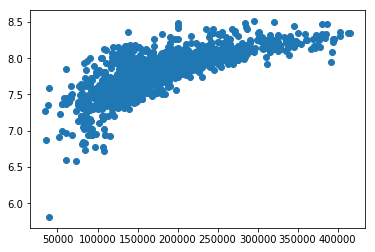

In [2406]:
test = [i**(1) for i in merged.totSF]
plt.scatter(merged.SalePrice, test)

In [2407]:
# separate train and test

In [2408]:
train = merged[merged.SalePrice.notnull()]
test = merged[merged.SalePrice.isnull()]
test.drop(['SalePrice'], axis =1, inplace = True)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [2409]:
months= {
   1: 1,
   4: 1,
   5: 2,
   6: 2,
   3: 2,
   7: 3,
   10: 3,
   2: 3,
   8: 4,
   12: 4,
   11: 4,
   9: 5}

       
train['MoSold']= train['MoSold'].replace(months)
test['MoSold']= test['MoSold'].replace(months)
train.columns


/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['BedroomAbvGr', 'BldgType_2fam', 'BldgType_Twnhs', 'BsmtExposure',
       'BsmtFinType1', 'CentralAir_0', 'Condition1_Pos', 'Condition1_RR',
       'Condition1_St', 'ExterCond',
       ...
       'SaleVremo', 'Street_0', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt',
       'YrSold', 'bathsF', 'bathsH', 'porchSF', 'totSF'],
      dtype='object', length=146)

In [2410]:
dictNhood2 = {
'Blmngtn': 7,
'Blueste': 3,
'BrDale': 1, 
'BrkSide': 2,
'ClearCr': 8,
'CollgCr': 8,
'Crawfor': 9,
'Edwards': 2,
'Gilbert': 7,
'IDOTRR': 1,
'MeadowV': 1,
'Mitchel': 5,
'NAmes': 4,
'NPkVill': 4,
'NWAmes': 6,
'NoRidge': 12,
'NridgHt': 12,
'OldTown': 2,
'SWISU': 4,
'Sawyer': 3,
'SawyerW': 6,
'Somerst': 9,
'StoneBr': 11,
'Timber': 10,
'Veenker': 9
}

train['Neighborhood']= train['Neighborhood'].replace(dictNhood2)
test['Neighborhood']= test['Neighborhood'].replace(dictNhood2)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2411]:
dictYr = {
    2006: 3,
    2007: 5,
    2008: 4,
    2009: 2,
    2010: 1
}

train['YrSold']= train['YrSold'].replace(dictYr)
test['YrSold']= test['YrSold'].replace(dictYr)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [2412]:
train.SalePrice = [np.log(i) for i in train.SalePrice]

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Ridge

In [2413]:
train = train.set_index('SalePrice').reset_index()


In [2414]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

X = train.iloc[:, 1:].values
y = train.iloc[:, 0]

import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [2415]:
X_train

array([[3, 0, 0, ..., 0.0, 0.0, 7.7284157798410416],
       [3, 0, 0, ..., 0.0, 0.0, 8.50976567558744],
       [2, 0, 0, ..., 0.0, 4.812184355372417, 7.688913336864796],
       ...,
       [3, 0, 0, ..., 1.0, 0.0, 8.347590407030058],
       [3, 0, 0, ..., 1.0, 0.0, 7.757051142032013],
       [3, 1, 0, ..., 0.0, 0.0, 6.9957661563048505]], dtype=object)

In [2416]:
X1_train = pd.DataFrame(X_train)
X1_train.columns = [list(train.columns)[:-1]]

y1_train = pd.Series(y_train)

X1_test = pd.DataFrame(X_test)
X1_test.columns = [list(train.columns)[:-1]]

In [2417]:
predictors=[i for [i] in list(X1_train.columns)]

In [2211]:
from sklearn import linear_model
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge1= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(X1_train,np.ravel(y1_train))

ridgeCoef1 = pd.DataFrame(data=ridge1.coef_, index = predictors).reset_index()

In [2212]:
y_pred = ridge1.predict(X1_test)

In [2213]:
ridge1.score(X_train, y_train)

0.9229262044912837

In [2214]:
ridge1.alpha_

5.72236765935022

In [2215]:
import numpy as np

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [2216]:
hyp = y_pred
targ = y_test
rmsle(hyp, targ)

0.11482812601621947

0.11482812601621947

In [2217]:
#0.11987515240801667
len(train)
len(test)

1459

In [2218]:
train.to_csv('bg_train.csv', index = False)
test.to_csv('bg_test.csv', index = False)

# Lasso

In [2418]:
alpha_lasso1 = alpha_ridge1
lasso = linear_model.LassoCV(n_alphas=100, alphas=alphas_lasso, cv=20, random_state=0, max_iter=500000).fit(X1_train,np.ravel(y1_train))
lasCoef2 = pd.DataFrame(data=lasso.coef_, index = predictors).reset_index()


In [2419]:
y_predL = lasso.predict(X1_test)

In [2420]:
lasso.score(X_train, y_train)
lasso.alpha_

0.01

In [2421]:
hyp = y_predL
targ = y_test
rmsle(hyp, targ)

#0.11413008789138834

0.009634993349483631

# Elastic Net

In [2223]:
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]

elasticNet = linear_model.ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, alphas=alpha_lasso1, fit_intercept=True, normalize=True, precompute='auto', max_iter=500000, tol=0.0001, cv=20, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=0, selection = 'cyclic').fit(X1_train,np.ravel(y1_train))



In [2063]:
y_predE = elasticNet.predict(X1_test)

In [2064]:
hyp = y_predE
targ = y_test
rmsle(hyp, targ)

0.12223940299624829

In [2065]:
elasticNet.l1_ratio_

1.0

# Test Predictions

In [2422]:
X2_train = pd.DataFrame(X)
X2_train.columns = [list(train.columns)[1:]]

y2_train = pd.Series(y)

X2_test = test
# X1_test.columns = [list(train.columns)[:-1]]

In [2423]:
len(X2_test)

1459

In [2424]:
elasticNet = linear_model.ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, alphas=alpha_lasso1, fit_intercept=True, normalize=True, precompute='auto', max_iter=500000, tol=0.0001, cv=20, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=0, selection = 'cyclic').fit(X2_train,np.ravel(y2_train))

In [2425]:
lasso = linear_model.LassoCV(n_alphas=100, alphas=alphas_lasso, cv=20, random_state=0, max_iter=500000).fit(X2_train,np.ravel(y2_train))

In [2426]:
lasso.alpha_

0.01

In [2427]:
y_predE2 = elasticNet.predict(X2_test)

In [2428]:
y_predL2 = lasso.predict(X2_test)

In [2438]:
#y_predL2 = [math.exp(i) for i in y_predL2]

In [2433]:
SalePrice = pd.DataFrame(y_predL2)
SalePrice.columns = ['SalePrice']
#SalePrice

In [2434]:
path_to_file = "../../data/test.csv"
testFinal = pd.read_csv(path_to_file)

In [2435]:
testFinal = pd.concat([testFinal, SalePrice], axis =1)
#testFinal.set_index(['Id'], inplace = True)

In [2436]:
testResults = testFinal[['Id','SalePrice']]

In [2437]:
testResults.to_csv('testResultsL.csv', index = False)